## Download a csv from a jupyter notebook

In [ ]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Practice GroupBy operations with Video Games Sales data

## Introduction

This lab focuses on grouping and aggregation using the Video Games Sales dataset. You'll be working with the dataset to practice the following skills:

- Grouping the data based on one or multiple columns using the groupby function.
- Applying built-in functions like ``mean``, ``sum``, ``size``, and describe to aggregated groups.
- Using different aggregation functions for different columns using ``.agg`` or ``.aggregate``, including custom defined functions.
- Applying advanced custom functions using ``.apply``.
- Utilizing the ``.transform`` function to apply transformations to groups while preserving the original DataFrame shape.

### The Dataset used

For this lab, we will be using the Video Games Sales dataset from Kaggle. The dataset contains information about video game sales, including the game title, platform, genre, publisher, and sales figures in different regions. It provides a comprehensive overview of the video game industry.

### Analysis and activities

In this lab, you will apply grouping and aggregation techniques to answer various questions about the video game sales dataset. You will group the data by different columns, calculate statistics such as mean and sum, analyze trends over time, identify top performers, and explore regional preferences for platforms, genres, and publishers.

Begin by going through the reading material and analysis sections of the lab notebook. Once you feel comfortable, proceed to the activities section to practice your skills and gain a deeper understanding of grouping and aggregating data with pandas.

In [1]:
import pandas as pd

In [2]:
games_sales_df = pd.read_csv('files/vgsales.csv')

In [3]:
games_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Discovering the dataset

In [4]:
#show the number of cells in the dataframe
print("video games dataframe size: ", games_sales_df.size)

#show the number of records (rows) in the dataframe
print("number of games: ", len(games_sales_df))

video games dataframe size:  182578
number of games:  16598


In [5]:
games_sales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

1. Calculate the total global sales for each ``Platform``

    Store the resulting series in the variable ``total_global_sales_by_platform``.

In [6]:
total_global_sales_by_platform = games_sales_df.groupby(['Platform']).sum()['Global_Sales']
total_global_sales_by_platform

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

2. Find the top-selling genre based on global sales

    Note: The top-selling genre is the genre that has the maximum sum of ``Global_Sales``.

In [7]:
top_selling_genre = games_sales_df.groupby(['Genre']).sum()['Global_Sales'].sort_values(ascending = False)

In [8]:
games_sales_df.groupby('Genre')['Global_Sales'].sum().idxmax()

'Action'

3. Create a bar chart to visualize the sum of ``Global_Sales`` per ``Genre``

    Store the resulting chart in the variable ``global_sales_chart``.

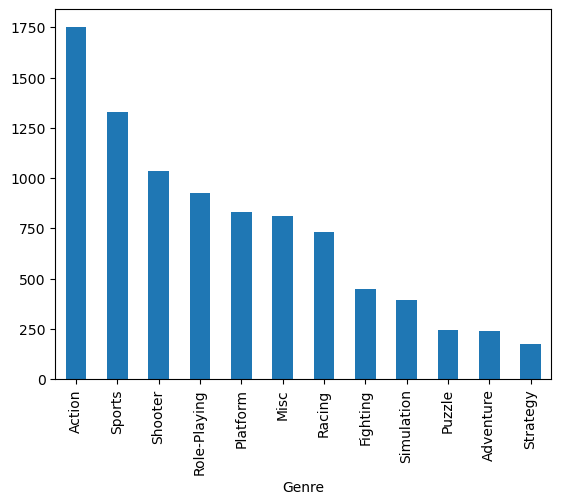

In [9]:
global_sales_chart = top_selling_genre.plot(kind = 'bar')

4. Calculate the average global sales for each ``Publisher``

    Store the resulting dataframe in the variable ``avg_sales_per_publisher``.

In [10]:
avg_sales_per_publisher = games_sales_df.groupby(['Publisher'])['Global_Sales'].mean().reset_index()
avg_sales_per_publisher

,Publisher,Global_Sales
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.281111
...,...,...
573,id Software,0.030000
574,imageepoch Inc.,0.020000
575,inXile Entertainment,0.100000
576,"mixi, Inc",0.860000


5. Calculate the total ``EU_Sales`` for each platform-year combination

    Store the resulting series in the variable ``platform_year_eu_sales``.

In [11]:
platform_year_eu_sales = games_sales_df.groupby(['Platform', 'Year'])['EU_Sales'].sum()
platform_year_eu_sales

Platform  Year  
2600      1980.0     0.67
          1981.0     1.96
          1982.0     1.65
          1983.0     0.34
          1984.0     0.01
                    ...  
XB        2008.0     0.04
XOne      2013.0     5.29
          2014.0    17.75
          2015.0    17.98
          2016.0     4.63
Name: EU_Sales, Length: 241, dtype: float64

6. Find the number of publishers in each ``Platform``

    Calculate the number of publishers within each "Platform" and store the resultant dataframe in the variable ``no_publisher_per_platform``. The "Publishers_Count" column in ``no_publisher_per_platform`` should store the publisher count.

In [12]:
no_publisher_per_platform = games_sales_df.groupby(['Platform'])['Publisher'].nunique().reset_index(name = 'Publishers_Count')#.rename(columns={'Publisher':'Publishers_Count'})
no_publisher_per_platform

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


Otra solución

In [13]:
games_sales_df.groupby('Platform')['Publisher'].apply(lambda x: x.nunique()).reset_index(name='Publishers_Count')

,Platform,Publishers_Count
0,2600,26
1,3DO,3
2,3DS,81
3,DC,15
4,DS,175
5,GB,17
6,GBA,87
7,GC,52
8,GEN,7
9,GG,1


7. Find the publisher with the most occurences for each ``Platform``

    Store the resulting dataframe in the variable ``most_frequent_publisher_platform``.

    Note: return the publisher with the smallest lexicographical name in case there is a tie in the number of occurences.

In [14]:
most_frequent_publisher_platform = games_sales_df.groupby('Platform')['Publisher'].agg(lambda x: x.mode().min()).reset_index()
most_frequent_publisher_platform

,Platform,Publisher
0,2600,Atari
1,3DO,Imageworks
2,3DS,Namco Bandai Games
3,DC,Sega
4,DS,Ubisoft
5,GB,Nintendo
6,GBA,THQ
7,GC,Electronic Arts
8,GEN,Sega
9,GG,Sega


8. Find the publisher with the highest total global sales for each ``Year``

    Store the resulting dataframe in the variable ``top_publisher_year``.

In [15]:
top_publisher_year = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index().sort_values(['Year', 'Global_Sales'], ascending = True).drop_duplicates('Year',keep='last').reset_index(drop= True)
top_publisher_year.rename(columns={'Publisher':'Top_Selling_Publisher','Global_Sales':'Global_Sales_Sum'}, inplace = True)

Otra solución

In [16]:
yearly_publisher_sales = games_sales_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum()
yearly_publisher_sales

Year    Publisher                   
1980.0  Activision                      3.02
        Atari                           8.36
1981.0  20th Century Fox Video Games    1.35
        Activision                      8.50
        Atari                           8.45
                                        ... 
2016.0  Yeti                            0.02
        dramatic create                 0.03
2017.0  Idea Factory                    0.01
        Sega                            0.04
2020.0  Ubisoft                         0.29
Name: Global_Sales, Length: 2321, dtype: float64

In [17]:
top_publisher_year = yearly_publisher_sales.groupby('Year').idxmax().apply(lambda x: x[1]).reset_index(name='Top_Selling_Publisher')
top_publisher_year

,Year,Top_Selling_Publisher
0,1980.0,Atari
1,1981.0,Activision
2,1982.0,Atari
3,1983.0,Nintendo
4,1984.0,Nintendo
5,1985.0,Nintendo
6,1986.0,Nintendo
7,1987.0,Nintendo
8,1988.0,Nintendo
9,1989.0,Nintendo


In [18]:
top_publisher_year['Global_Sales_Sum'] = top_publisher_year.apply(lambda row: yearly_publisher_sales.loc[row['Year'], row['Top_Selling_Publisher']], axis=1)

In [19]:
top_publisher_year

,Year,Top_Selling_Publisher,Global_Sales_Sum
0,1980.0,Atari,8.36
1,1981.0,Activision,8.50
2,1982.0,Atari,19.43
3,1983.0,Nintendo,10.96
4,1984.0,Nintendo,45.56
5,1985.0,Nintendo,49.95
6,1986.0,Nintendo,16.18
7,1987.0,Nintendo,11.95
8,1988.0,Nintendo,36.44
9,1989.0,Nintendo,63.88


9. Find the maximum sales year for each ``Genre``

    Store the resulting dataframe in the variable ``max_sales_year_per_genre``.

In [55]:
genre = games_sales_df.groupby(['Genre', 'Year'])['Global_Sales'].max().reset_index()
max_sales_year_per_genre = genre.sort_values(['Genre','Global_Sales'], ascending=True).drop_duplicates('Genre', keep='last')
max_sales_year_per_genre = max_sales_year_per_genre.sort_values('Global_Sales', ascending=False).reset_index(drop = True)
max_sales_year_per_genre

,Genre,Year,Global_Sales
0,Sports,2006.0,82.74
1,Platform,1985.0,40.24
2,Racing,2008.0,35.82
3,Role-Playing,1996.0,31.37
4,Puzzle,1989.0,30.26
5,Misc,2006.0,29.02
6,Shooter,1984.0,28.31
7,Simulation,2005.0,24.76
8,Action,2013.0,21.40
9,Fighting,2008.0,13.04


Otra solución

In [56]:
max_sales_year_per_genre = games_sales_df.groupby('Genre')['Global_Sales'].idxmax()
max_sales_year_per_genre = games_sales_df.loc[max_sales_year_per_genre, ['Genre', 'Year', 'Global_Sales']]
max_sales_year_per_genre

,Genre,Year,Global_Sales
16,Action,2013.0,21.40
50,Adventure,1992.0,11.18
39,Fighting,2008.0,13.04
7,Misc,2006.0,29.02
1,Platform,1985.0,40.24
5,Puzzle,1989.0,30.26
2,Racing,2008.0,35.82
4,Role-Playing,1996.0,31.37
9,Shooter,1984.0,28.31
10,Simulation,2005.0,24.76
